# DSCI 503 - Project 02
### Nathan Stratford

In [2]:
import numpy as np
import math 
import matplotlib.pyplot as plt

## Part A: Stock Simulation Function
Simulating the stock price and how it increases over a 60 day period given a volatility and rate. Displaying the results 

In [4]:
# Function should return an array that contains start as first element, with the rest being the simulated prices(num days)
def simulate_stock(start, rate, vol, days):
    # Create an array of randomly generated daily yields
    loc = rate / 252
    scale = vol / (252 ** 0.5)
    daily_yields = np.random.normal(loc, scale, days)

    cumulative_yields = np.cumsum(daily_yields)
    daily_multipliers = np.exp(cumulative_yields)
    simulated_prices = np.round(daily_multipliers * start, 2)
    return np.concatenate(([start], simulated_prices))


We will now test the simulate_stock function

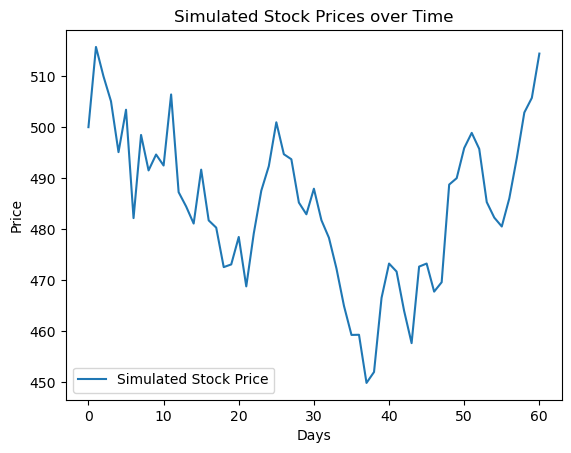

In [6]:
np.random.seed(1)
simulated_prices = simulate_stock(500, .08, 0.3, 60)
# x axis is days + 1
x_values = np.arange(61)
plt.plot(x_values, simulated_prices, label="Simulated Stock Price")
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Simulated Stock Prices over Time')
plt.legend()
plt.show()

## Part B: Annual Yield Function
A function to calculate the annual yield using a formula of simulated_prices we calculated from Part A

In [8]:
def find_yield(run):
    initial_price = run[0]
    final_price = run[len(run) - 1]

    num_days = len(run) - 1
    annual_yield = math.log(final_price / initial_price) * (252 / num_days)
    return round(annual_yield, 4)

About to test if the field_yield function works correctly

In [10]:
print(find_yield(simulated_prices))

0.1196


The next cell will explore the potential variability in our ismulated rus by creating and plotting 25 siumulated runs

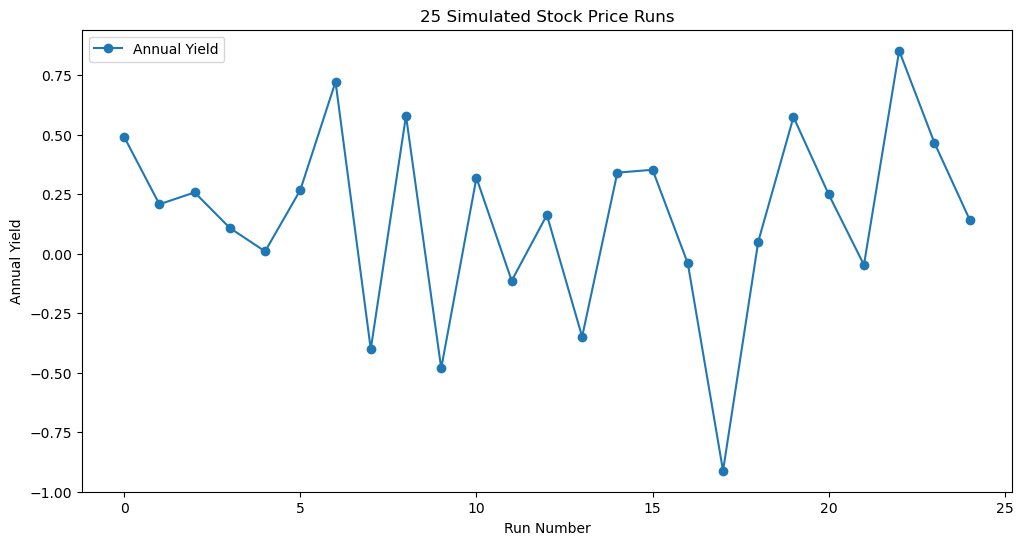

In [12]:
yields = []
plt.figure(figsize=(12,6))
for i in range(25):
    new_run = simulate_stock(100, .04, 0.3, 200)
    new_yield = find_yield(new_run)
    yields.append(new_yield)
x_values = np.arange(len(yields))
plt.plot(x_values, yields, marker='o', label="Annual Yield")
plt.xlabel('Run Number')
plt.ylabel('Annual Yield')
plt.title('25 Simulated Stock Price Runs')
plt.legend()
plt.show()


## Part C: Finding Seeds that Generate Specific Outcomes
In the cell bloew, Stock A has the highest simulated final price

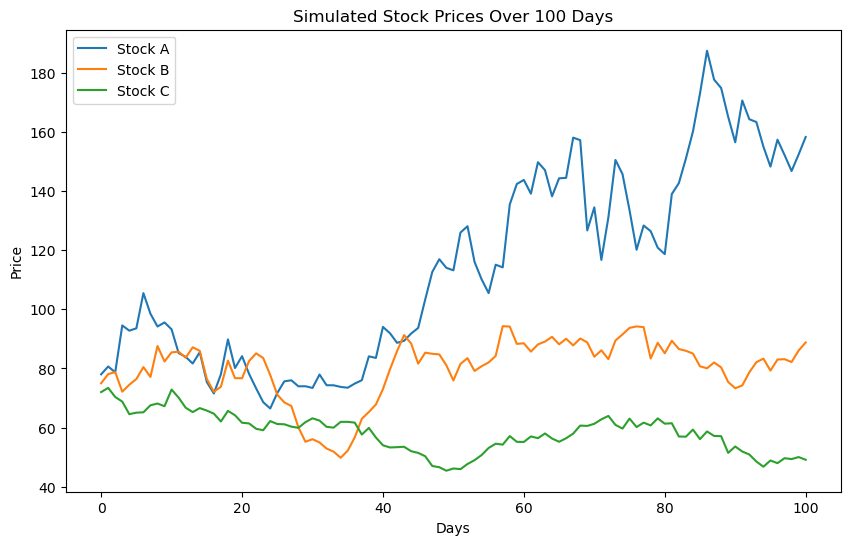

In [14]:
np.random.seed(5)
stock_a = simulate_stock(78, .04, 1.2, 100)
stock_b = simulate_stock(75, .08, 0.8, 100)
stock_c = simulate_stock(72, .16, 0.6, 100)

plt.figure(figsize=(10,6))
plt.plot(stock_a, label="Stock A")
plt.plot(stock_b, label="Stock B")
plt.plot(stock_c, label="Stock C")

# Adding labels and legend
plt.title('Simulated Stock Prices Over 100 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.show()


In the cell bloew, Stock B has the highest simulated final price

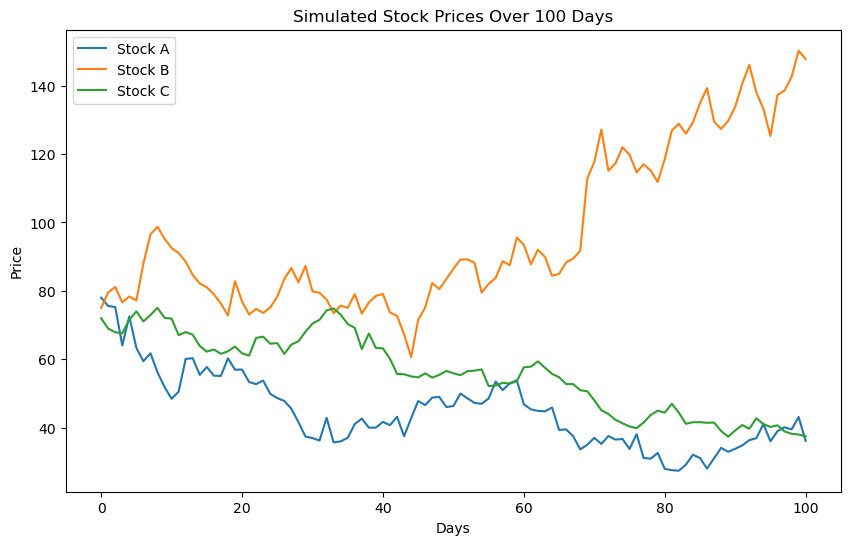

In [16]:
np.random.seed(2)
stock_a = simulate_stock(78, .04, 1.2, 100)
stock_b = simulate_stock(75, .08, 0.8, 100)
stock_c = simulate_stock(72, .16, 0.6, 100)

plt.figure(figsize=(10,6))
plt.plot(stock_a, label="Stock A")
plt.plot(stock_b, label="Stock B")
plt.plot(stock_c, label="Stock C")

# Adding labels and legend
plt.title('Simulated Stock Prices Over 100 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.show()

In the cell below, Stock C has the highest simulated final price.

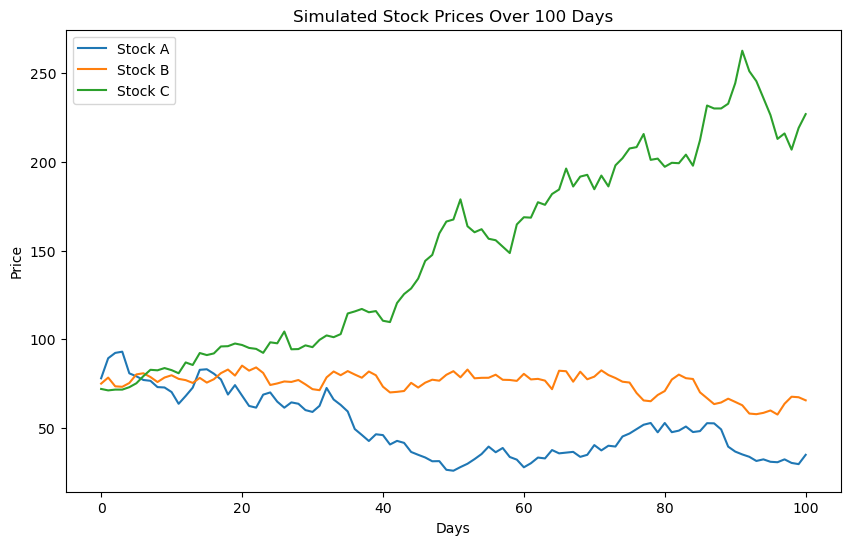

In [18]:
np.random.seed(3)
stock_a = simulate_stock(78, .04, 1.2, 100)
stock_b = simulate_stock(75, .08, 0.8, 100)
stock_c = simulate_stock(72, .16, 0.6, 100)

plt.figure(figsize=(10,6))
plt.plot(stock_a, label="Stock A")
plt.plot(stock_b, label="Stock B")
plt.plot(stock_c, label="Stock C")

# Adding labels and legend
plt.title('Simulated Stock Prices Over 100 Days')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()

plt.show()

## Part D: Monte Carlo Simulation

In [20]:
def monte_carlo(start, rate, vol, days, num_runs):
    final_prices = []
    annual_yields = []

    for i in range(num_runs):
        run = simulate_stock(start, rate, vol, days)
        final_prices.append(run[-1])
        annual_yield = find_yield(run)
        annual_yields.append(annual_yield)
        
    return (np.array(final_prices), np.array(annual_yields))

About to test the function by running a Monte Carlo simulation with a specific seed.

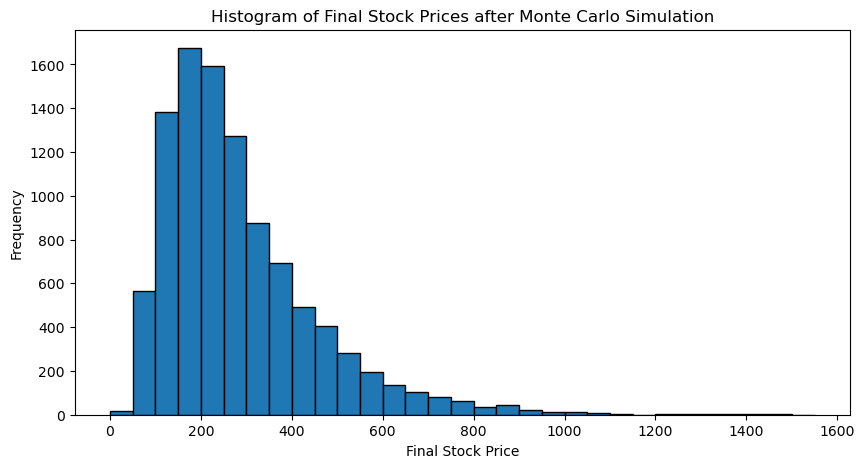

In [22]:
np.random.seed(1)
final_prices, annual_yields = monte_carlo(200, .10, 0.4, 500, 10000)

plt.figure(figsize=(10,5))
bins = np.arange(0, 1600, 50)
plt.hist(final_prices, bins, edgecolor='black')

plt.xlabel("Final Stock Price")
plt.ylabel("Frequency")
plt.title("Histogram of Final Stock Prices after Monte Carlo Simulation")
plt.show()

About to display the 10th, 25th, 75th, and 90th percentiles of the simulated final prices.


In [24]:
percentiles = [10, 25, 50, 75, 90]
final_percentiles = np.percentile(final_prices, percentiles)

# Keep track of both the element and the index
for i, perc in enumerate(percentiles):
    print(f"{perc}th percentile: {round(final_percentiles[i], 2)}")

10th percentile: 118.05
25th percentile: 165.57
50th percentile: 242.95
75th percentile: 357.56
90th percentile: 505.91


## Part E: Effects of Volatility

In [26]:
np.random.seed(1)
stock_A_prices, stock_A_annual_yields = monte_carlo(100, .12, 0.3, 150, 10000)
stock_B_prices, stock_B_annual_yields = monte_carlo(100, .12, 0.7, 150, 10000)

print(f"Average Annual Yield for A over 10000 runs: {round(np.mean(stock_A_annual_yields), 4)}")
print(f"Average Annual Yield for B over 10000 runs: {round(np.mean(stock_B_annual_yields), 4)}")



Average Annual Yield for A over 10000 runs: 0.1218
Average Annual Yield for B over 10000 runs: 0.1128


We will visually inspect the results of the two Monte Carlo simulations by plotting histograms of the final prices

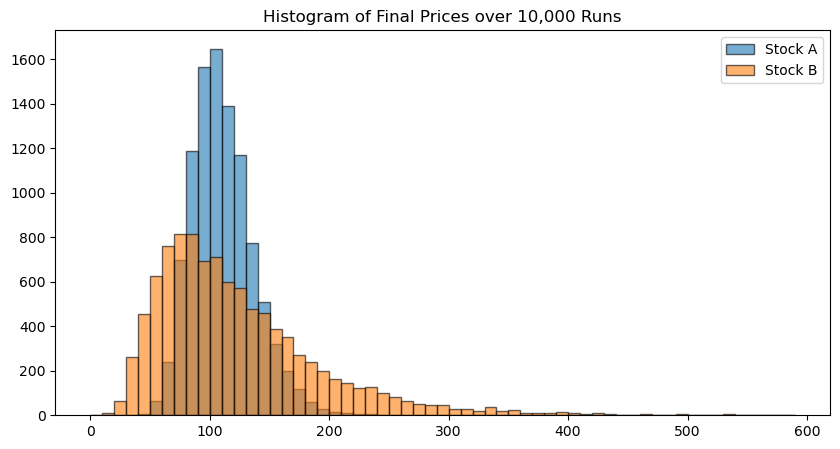

In [28]:
plt.figure(figsize=[10, 5])

plt.hist(stock_A_prices, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock A')
plt.hist(stock_B_prices, bins=np.arange(0, 600, 10), alpha=0.6, edgecolor='black', label='Stock B')

plt.title('Histogram of Final Prices over 10,000 Runs')
plt.legend()
plt.show()

## Part F: Comparing Two Stocks

In [30]:
np.random.seed(1)
num_runs = 10000
stock_A_prices, stock_A_annual_yields = monte_carlo(120, .08, 0.2, 252, num_runs)
stock_B_prices, stock_B_annual_yields = monte_carlo(120, .05, 0.5, 252, num_runs)

stock_A_win_count = 0
stock_A_greater_150 = 0

for i in range(len(stock_A_prices)):
    if stock_A_prices[i] > stock_B_prices[i]:
        stock_A_win_count += 1
print("Proportions of runs in which...")
print("-------------------------------")
print(f"A ends above B: {round(np.mean(stock_A_prices > stock_B_prices), 4)}")
print(f"A ends above 150: {round(np.mean(stock_A_prices > 150), 4)}")
print(f"B ends above 150: {round(np.mean(stock_B_prices > 150), 4)}")
print(f"A ends below 100: {round(np.mean(stock_A_prices < 100), 4)}")
print(f"B ends below 100: {round(np.mean(stock_B_prices < 100), 4)}")

Proportions of runs in which...
-------------------------------
A ends above B: 0.5206
A ends above 150: 0.2338
B ends above 150: 0.3619
A ends below 100: 0.095
B ends below 100: 0.3195


## Part G: Expected Call Payoff

In [32]:
np.random.seed(1)
stock_prices, stock_annual_yields = monte_carlo(200, .11, 0.4, 150, 10000)
#The maximum function automatically sets any negative values to zero
payoffs = np.maximum(stock_prices - 225, 0)
average_payoff = np.mean(payoffs)
print(f"Average Call Payoff: ${average_payoff:.2f}")

Average Call Payoff: $27.10
